# TD 2: Algorithme de Metropolis-Hasting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import seaborn

## Exemple: Modèle simple

In [2]:
def V1(x):
    return -np.log(1+np.sin(x*x))

In [3]:
def chaine1(N,k):
    #N:taille de l'espace d'état
    #Renvoie X_k où (X_n) CM de proba de transiton P et de proba invariante pi
    x=np.floor(21*npr.rand())
    for _ in range(k):
        if npr.rand()<0.5:
            y=(x-1)%(N+1)
        else:
            y=(x+1)%(N+1)
        alpha=min(1,np.exp(V1(x)-V1(y)))
        if npr.rand()<alpha:
           x=y
    return int(x)
  

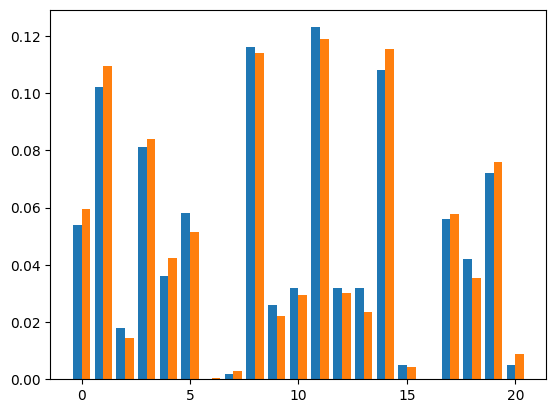

In [4]:
N=20 #Taille espace d'état
M=1000 #Nb de simulations
E=np.arange(0,N+1,1)
res=np.zeros(21)
for _ in range(M):
    res[chaine1(N,100)]+=1
plt.bar(E-0.2,res/M,width=0.4)
p=np.array([np.exp(-V1(n)) for n in range(0,21)])
pi=p/sum(p)
plt.bar(E+0.2,pi,width=0.4)
plt.show()

## Modèle d'Ising

In [5]:
def V_Ising(X):
    # X=matrice de -1 et 1 de taille N*N
    S=0
    N=len(X)
    for i in range(N):
        for j in range(N):
            S=S+X[i,j]*X[(i+1)%N,j]+X[i,j]*X[i,(j+1)%N]+X[i,j]*X[(i-1)%N,j]+X[i,j]*X[i,(j-1)%N]
    return -S

In [6]:
#test
X=np.array([[-1,-1,1],[1,1,-1],[-1,1,-1]])
print(V_Ising(X))
Y=np.array([[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]])
print(V_Ising(Y))

12
-36


In [8]:
N = len(X)
X[2%N,1]

1

In [9]:
def prob_Ising(k,N,beta):
    #Renvoie X_k où (X_n) CM de proba invariante pi_beta
    x=npr.binomial(1,0.5,N*N)*2-1
    x.resize(N,N)
    for _ in range(k):
        y=npr.binomial(1,0.5,N*N)*2-1
        y.resize(N,N)
        alpha=min(1,np.exp(beta*(V_Ising(x)-V_Ising(y))))
        if npr.rand()<alpha:
            x=y
    return x

In [10]:
def prob_Ising_bis(k,N,beta): # Avec un autre choix de y
    #Renvoie X_k où (X_n) CM de proba invariante pi_beta
    x=npr.binomial(1,0.5,N*N)*2-1
    x.resize(N,N)
    for _ in range(k):
        coord=npr.randint(0,N,2)
        y=x
        y[coord[0],coord[1]]*=-1
        y.resize(N,N)
        alpha=min(1,np.exp(beta*(V_Ising(x)-V_Ising(y))))
        if npr.rand()<alpha:
            x=y
    return x

In [11]:
prob_Ising(3,4,1)

array([[-1, -1, -1, -1],
       [ 1, -1, -1, -1],
       [ 1,  1,  1,  1],
       [ 1, -1, -1,  1]])

C:\Users\lamin\AppData\Local\Temp\ipykernel_11128\952992153.py:8: RuntimeWarning: overflow encountered in exp
  alpha=min(1,np.exp(beta*(V_Ising(x)-V_Ising(y))))


<Axes: >

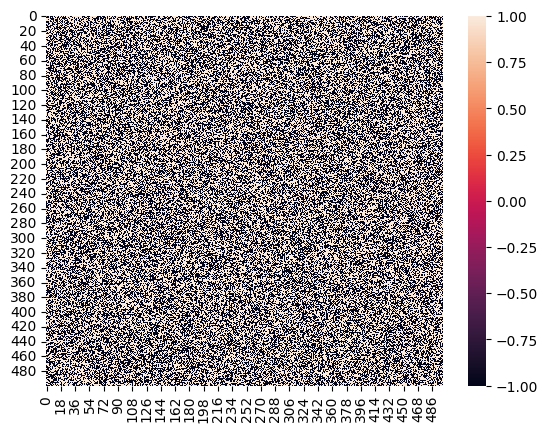

In [12]:
seaborn.heatmap(prob_Ising(100,500,1))

<Axes: >

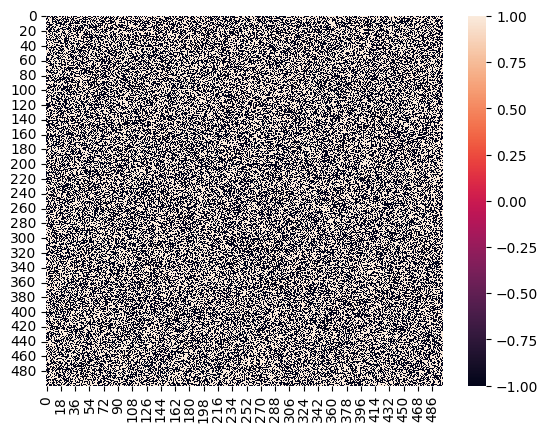

In [11]:
seaborn.heatmap(prob_Ising_bis(100,500,1))